# Pronósticos en Series de Tiempo

## Promédios Móviles

Los *Promedios Móviles* (MA), como su nombre lo indica, utilizan un promedio dinámico (media) para analizar la tendencia *central* de una variable numérica a lo largo del tiempo. Los métodos de análisis de pronóstico involucran dos componentes involucrados en la evolución en una serie de tiempo: *señal* y *ruido*.

* La **señal** representa la tendencia central de una variable, es decir, el *medio* componente. Esto describe la evolución creciente, decreciente o plana de la variable.
* El **ruido** representa el nivel de variación aleatoria alrededor de la tendencia central. Esta es la parte que deseamos evitar para enfocarnos en la señal.

Un promedio móvil ayuda a distinguir *rebotes aleatorios* en una serie de datos de los cambios reales y fundamentales en la señal. Para calcular un promedio móvil, tomamos el promedio de las últimas observaciones recientes y consideramos el promedio como la mejor estimación de lo que hará la serie a continuación.

Así, para la variavle $y$ calcular el promédio móvil de rango $r$ usamos la fórmula:

$$\hat{y}_t(r) = \mathrm{AVERAGE}(y_{t-1}, \cdots , y_{t-r})$$

**Notation** 
* $y_{t}$: dato al momento $t$
* $\hat{y}_{t}(r)$: Prom. Móv. de rango $r$ al tiempo $t$

Por ejemplo, el primer valor en un PM de rango 3 des:

$$\hat{y}_1(3) = \mathrm{AVERAGE}(y_{t-1},y_{t-2},y_{t-3})$$


### Calculation steps using Python

In [3]:
from pandas import Series
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Generate time series

In [4]:
# GENERETE A TIME SERIES:
Date = pd.DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27'])
Metric = np.array([855, 847, 1000, 635, 346, 2146, 1328, 1322, 3124, 1012, 1280, 2435, 1016, 3465, 1107, 1172, 3432, 836, 142, 345, 2602, 750, 716, 770, 900, 50, 150])

print(type(Date), len(Date))
print(type(Metric), len(Metric))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'> 27
<class 'numpy.ndarray'> 27


In [5]:
# FORMA 1
# Unir como DataFrame: (Opcional)
join = list(zip(Date, Metric))  	#
print(type(join)) #
print(join)

<class 'list'>
[(Timestamp('2019-07-01 00:00:00'), 855), (Timestamp('2019-07-02 00:00:00'), 847), (Timestamp('2019-07-03 00:00:00'), 1000), (Timestamp('2019-07-04 00:00:00'), 635), (Timestamp('2019-07-05 00:00:00'), 346), (Timestamp('2019-07-06 00:00:00'), 2146), (Timestamp('2019-07-07 00:00:00'), 1328), (Timestamp('2019-07-08 00:00:00'), 1322), (Timestamp('2019-07-09 00:00:00'), 3124), (Timestamp('2019-07-10 00:00:00'), 1012), (Timestamp('2019-07-11 00:00:00'), 1280), (Timestamp('2019-07-12 00:00:00'), 2435), (Timestamp('2019-07-13 00:00:00'), 1016), (Timestamp('2019-07-14 00:00:00'), 3465), (Timestamp('2019-07-15 00:00:00'), 1107), (Timestamp('2019-07-16 00:00:00'), 1172), (Timestamp('2019-07-17 00:00:00'), 3432), (Timestamp('2019-07-18 00:00:00'), 836), (Timestamp('2019-07-19 00:00:00'), 142), (Timestamp('2019-07-20 00:00:00'), 345), (Timestamp('2019-07-21 00:00:00'), 2602), (Timestamp('2019-07-22 00:00:00'), 750), (Timestamp('2019-07-23 00:00:00'), 716), (Timestamp('2019-07-24 00:0

In [12]:
data = pd.DataFrame(join, columns=["Date", "Metric"])		#
print(type(data)) #
data.tail(10)

<class 'pandas.core.frame.DataFrame'>


,Date,Metric
17,2019-07-18,836
18,2019-07-19,142
19,2019-07-20,345
20,2019-07-21,2602
21,2019-07-22,750
22,2019-07-23,716
23,2019-07-24,770
24,2019-07-25,900
25,2019-07-26,50
26,2019-07-27,150


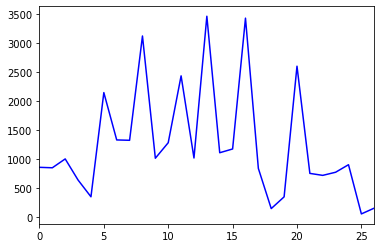

In [51]:
# Como DataFrame:
data['Metric'].plot(color='blue')
pyplot.show()

### Graficación

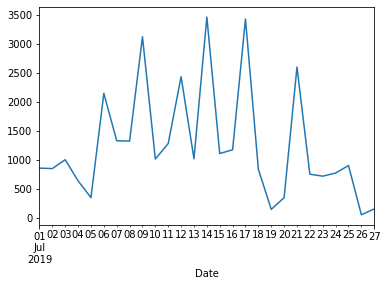

In [7]:
# Como TimeSeries:
ts = pd.Series(np.array(data["Metric"]), index=pd.DatetimeIndex(data["Date"]))
ts.plot()

## 2. Suavizamiento del Ruido usando PM
### Tabulación:

In [9]:
# Definiendo la ventana, p.ej amplitud = 4:
rolling = ts.rolling(window=4)
print(type(rolling))
print(rolling)

<class 'pandas.core.window.Rolling'>
Rolling [window=4,center=False,axis=0]


In [11]:
# Aplicando Promedio Movil Retroactivo:
rolling_mean = rolling.mean()
print(rolling_mean.tail(10))
print(type(rolling_mean.head(10)))

Date
2019-07-18    1636.75
2019-07-19    1395.50
2019-07-20    1188.75
2019-07-21     981.25
2019-07-22     959.75
2019-07-23    1103.25
2019-07-24    1209.50
2019-07-25     784.00
2019-07-26     609.00
2019-07-27     467.50
dtype: float64
<class 'pandas.core.series.Series'>


In [13]:
# En 1-Paso crear Pronóstico e incorporarlos a los datos previos:
data["Rolling_mean"] = data['Metric'].rolling(window=4).mean()
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,Date,Metric,Rolling_mean
0,2019-07-01,855,NaN
1,2019-07-02,847,NaN
2,2019-07-03,1000,NaN
3,2019-07-04,635,834.25
4,2019-07-05,346,707.00
5,2019-07-06,2146,1031.75
6,2019-07-07,1328,1113.75
7,2019-07-08,1322,1285.50
8,2019-07-09,3124,1980.00
9,2019-07-10,1012,1696.50


### Graficación Conjunta

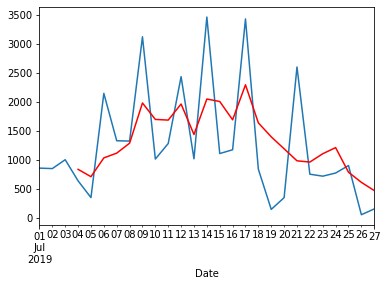

In [68]:
# Como TimeSeries:
ts.plot()
rolling_mean.plot(color='red')
pyplot.show()

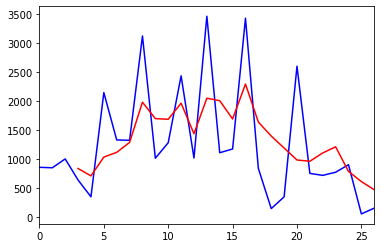

In [38]:
# Como DataFrame:
data['Metric'].plot(color='blue')
data['Rolling_mean'].plot(color='red')    # MA Series plot
pyplot.show()

You can see that the chart of the moving averages is a good bit smoother than the chart of the original data series. It appears that the general drift is gently up and then gently back down. The smoothing that almost always results from calculating moving averages tends to locate the underlying level of the series at any given point, and the random events tend to cancel themselves out.

**OBS: (Lost Periods)**
Nothing’s free, though, and the principal cost of using moving averages is that you lose some observations at the start of the series. In our example the actual observed values start at Day 1 and continue through Day 27. However, the moving averages start at Day 4—with a three-period moving average, you lose three periods at the start. In general, you lose as many periods at the start of a moving average as there are periods in the moving average. Clearly, if you were to try to forecast a value for Day 3 using a moving average of three periods, you would want to find the average of Day 2, Day 1, and Day 0. But there is no Day 0.

There are different ways to accommodate this problem, but nothing is as satisfactory
as having a good long baseline of observations. That becomes clearer in Chapter 4 ,
“Forecasting a Time Series: Smoothing,” which discusses exponential smoothing.

### Smoothing Versus Tracking
In general, **the more observations you place in a moving average, the more smoothing you get**. Compare the moving average charted in Figure 3.3 (which is a moving average of length 3) with the moving average charted in Figure 3.4 (which is of length 4).

In [2]:
Date2 = pd.DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27'])
Metric2 = np.array([855, 847, 1000, 635, 346, 2146, 1328, 1322, 3124, 1012, 1280, 2435, 1016, 3465, 1107, 1172, 3432, 636, 82, 145, 52, 60, 286, 390, 750, 50, 250])

print(type(Date2), len(Date2))
print(type(Metric2), len(Metric2))

NameError: name 'pd' is not defined

In [63]:
ts2 = pd.Series(Metric2, index=Date2)
print(type(ts2))
print(ts2.head(10))

<class 'pandas.core.series.Series'>
2019-07-01     855
2019-07-02     847
2019-07-03    1000
2019-07-04     635
2019-07-05     346
2019-07-06    2146
2019-07-07    1328
2019-07-08    1322
2019-07-09    3124
2019-07-10    1012
dtype: int32


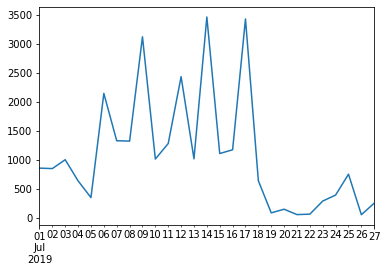

In [64]:
ts2.plot()

In [1]:
# PM-4: (en 2 pasos)
rolling2 = ts2.rolling(window=4)
rolling_mean2 = rolling2.mean()
rolling2.tail()
#print(rolling_mean2.head(10))

NameError: name 'ts2' is not defined

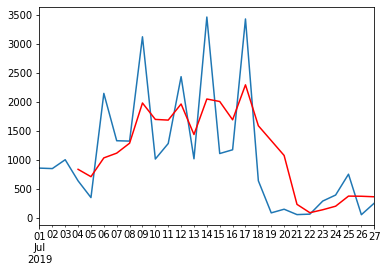

In [67]:
ts2.plot()
rolling_mean2.plot(color='red')
pyplot.show()

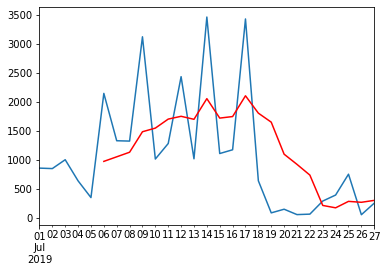

In [69]:
# PM-6:
rolling3 = ts2.rolling(window=6)
rolling_mean3 = rolling3.mean()
#print(rolling_mean2.head(25))

ts2.plot()
rolling_mean3.plot(color='red')
pyplot.show()

Of course, the cost of using a 4-day average instead of a 3-day average is that **you lose an additional period** at the start of the moving average. Notice that the 4-day MA starts on Day 5 in Figure ?? , whereas the 3-day moving average starts on Day 4 in Figure ?? 

There’s another side to that issue: **What’s the effect of a longer moving average when an abrupt change in the level of a series isn’t random noise but a real, persistent shift?** See Figure ?? .

The 4-MA, does not catch up to the drop in the actuals until the twentysecond day—one period later than the three-day moving average.

The difference is due to what’s called ***tracking***, which is the other side of the smoothing coin. Other things being equal, a moving average based on fewer actual observations tracks a change in the series level earlier and faster than one based on more actual observations.  

...

### Promedios Móviles Ponderados

El promedio móvil ponderado generalmente asigna mayor peso a las observaciones más recientes.

In [76]:
data3 = np.array([855, 847, 1000, 635, 346, 2146])
weights = np.array([0.1875, 0.1875, 0.3750, 0.7500, 1.5000, 3.000])
weighted_data = data3*weights

print(type(weighted_data))
weighted_data

<class 'numpy.ndarray'>


array([ 160.3125,  158.8125,  375.    ,  476.25  ,  519.    , 6438.    ])

In [73]:
join = list(zip(data3, weights, weighted_data)) 
join

[(855, 0.1875, 160.3125),
 (847, 0.1875, 158.8125),
 (1000, 0.375, 375.0),
 (635, 0.75, 476.25),
 (346, 1.5, 519.0),
 (2146, 3.0, 6438.0)]

In [79]:
wdf = pd.DataFrame(joined, columns=["Data", "Weights", "Weighted_Data"])
print(type(wdb))
wdf

<class 'pandas.core.frame.DataFrame'>


,Data,Weights,Weighted_Data
0,855,0.1875,160.3125
1,847,0.1875,158.8125
2,1000,0.3750,375.0000
3,635,0.7500,476.2500
4,346,1.5000,519.0000
5,2146,3.0000,6438.0000


In [78]:
#df = pd.DataFrame(wdb)
#print(type(df))
#df

In [89]:
# Totales:
total=wdf['Data'].sum()
total_weights=wdf['Weights'].sum()
wtotal=wdf['Weighted_Data'].sum()

print("Data Sum:", total)
print("Weights Sum:", total_weights)
print("Weighted_Data Sum:", wtotal)

Data Sum: 5829
Weights Sum: 6.0
Weighted_Data Sum: 8127.375


In [90]:
# Promedios:
Avg=wdf['Data'].mean()
Avg_weights=wdf['Weights'].mean()
wAvg=wdf['Weighted_Data'].mean()

print("Data Avg:", Avg)
print("Weights Avg:", Avg_weights)
print("Weighted_Data Avg:", wAvg)

Data Avg: 971.5
Weights Avg: 1.0
Weighted_Data Avg: 1354.5625


** Total de pesos**
En este ejemplo, los pesos suman un total de 6.0. Este hecho es en gran medida una cuestión de conveniencia, dado que el promedio móvil es de seis períodos. 

**Normalización de Pesos** Podemos *normalizar* el total de los pesos a 1 haciendo: $$pweigth = \frac{Weigth}{Sum(Weigths)}$$

In [91]:
pweights = weights/df["Weights"].sum() 
pweights

array([0.03125, 0.03125, 0.0625 , 0.125  , 0.25   , 0.5    ])

In [93]:
joined = list(zip(data3, weights, pweights, weighted_data)) 
wdb=pd.DataFrame(joined, columns=["Data", "Weights", "pWeights", "Weighted_Data"])
df2=pd.DataFrame(wdb)
df2

,Data,Weights,pWeights,Weighted_Data
0,855,0.1875,0.03125,160.3125
1,847,0.1875,0.03125,158.8125
2,1000,0.3750,0.06250,375.0000
3,635,0.7500,0.12500,476.2500
4,346,1.5000,0.25000,519.0000
5,2146,3.0000,0.50000,6438.0000


#### Total of Weights
The weights total to 6.0. This fact is largely a matter of convenience, given that the average is six periods long. You would get the same result if you doubled the size of each weight and at the end divided by 12.
$$ \mathrm{SUM}(weights) = \mathrm{COUNT}(timeCycles) $$

In [98]:
totalWeights=df2["Weights"].sum() 
totalWeights   

6.0

In [99]:
totalpWeights=df2["pWeights"].sum() 
totalpWeights   

1.0

### Los Pesos más Recientes son más Grandes

**El peso que se aplica a la observación más reciente es el mayor**. Cuanto más atrás se produce una observación, menor es su peso....

Esto tiene bastante sentido: *A menos que haya algún tipo de estacionalidad en los datos, las condiciones del mercado que estaban vigentes seis períodos atrás son menos propensas a representar las condiciones del mercado establecidas un período atrás*. Por otro lado, las más recientes cuanto mayor sea el valor observado, mejor será como indicador del siguiente valor aún no observado.

...

El patrón utilizado por cualquier esquema de ponderación, como el utilizado por QuickBooks, tiene implicaciones sobre cómo los promedios móviles rastrean los datos reales o los suavizan. En general, cuando los valores más recientes se ponderan más fuertemente, el promedio móvil rastrea más rápidamente. Cuando los valores se ponderan por igual,..., el promedio móvil tiende a suavizar los valores originales más de lo que los rastrea. Probablemente llegaría a esa conclusión intuitivamente, pero la Figura 3.8 proporciona un ejemplo visual.

...Observe en la Figura 3.8 que el promedio móvil ponderado de seis días, que se muestra con una línea punteada, rastrea las observaciones reales (línea discontinua) de manera bastante cercana y rápida. Tiene picos y valles un período después de las observaciones reales. En contraste, el promedio móvil no ponderado de seis días (línea gruesa y continua) suaviza los datos reales, suprimiendo el ruido irrelevante, pero a un costo. Puede perderse un cambio importante en el nivel de la serie hasta que sea demasiado tarde para hacer algo al respecto.

In [111]:
date = pd.DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27'])
metric = np.array([855, 847, 1000, 635, 346, 2146, 1328, 1322, 3124, 1012, 1280, 2435, 1016, 3465, 1107, 1172, 3432, 836, 142, 345, 2602, 750, 716, 770, 900, 50, 150])
weights = np.array([	0.003,	0.005,	0.008,	0.011,	0.013,	0.016,	0.019,	0.021,	0.024,	0.026,	0.029,	0.032,	0.034,	0.037,	0.04,	0.042,	0.045,	0.048,	0.05,	0.053,	0.056,	0.058,	0.061,	0.063,	0.066,	0.069,	0.071])
wighted = data*weights 

join = list(zip(date, metric, weights, wighted))
wdf=pd.DataFrame(join, columns=["date", "metric", "weights", "wighted"])
wdf.head(10)


,date,metric,weights,wighted
0,2019-07-01,855,0.003,2.565
1,2019-07-02,847,0.005,4.235
2,2019-07-03,1000,0.008,8.000
3,2019-07-04,635,0.011,6.985
4,2019-07-05,346,0.013,4.498
5,2019-07-06,2146,0.016,34.336
6,2019-07-07,1328,0.019,25.232
7,2019-07-08,1322,0.021,27.762
8,2019-07-09,3124,0.024,74.976
9,2019-07-10,1012,0.026,26.312


In [119]:
# Creación de las Time Series:
ts = pd.Series(metric, index=date)
wts = pd.Series(wighted, index=date)

print(ts.head(10)), print(wts.head(10))

2019-07-01     855
2019-07-02     847
2019-07-03    1000
2019-07-04     635
2019-07-05     346
2019-07-06    2146
2019-07-07    1328
2019-07-08    1322
2019-07-09    3124
2019-07-10    1012
dtype: int32
2019-07-01     2.565
2019-07-02     4.235
2019-07-03     8.000
2019-07-04     6.985
2019-07-05     4.498
2019-07-06    34.336
2019-07-07    25.232
2019-07-08    27.762
2019-07-09    74.976
2019-07-10    26.312
dtype: float64


(None, None)

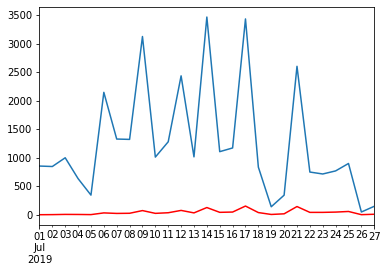

In [131]:
ts.plot()
wts.plot(color='red')
pyplot.show()

In [121]:
wdb["weights"].sum()

1.0

In [126]:
# PM-4:
PM4 = ts.rolling(window=4).mean()
# PM-6:
PM6 = ts.rolling(window=6).mean()
# PM-6 Ponderado:
wPM6 = wts.rolling(window=6).mean()

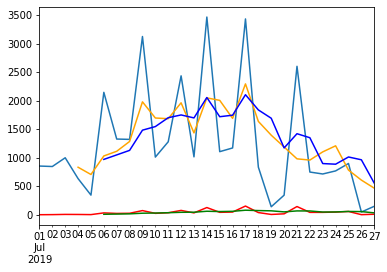

In [130]:
ts.plot()
wts.plot(color='red')
PM4.plot(color='orange')
PM6.plot(color='blue')
wPM6.plot(color='green')
pyplot.show()

In [133]:
# *Unido en un DataFrame:
joined = list(zip(index, data, weights, wighted, PM4, PM6, wPM6))
wdb=pd.DataFrame(joined, columns=["index", "data", "weights", "wighted", "MA4", "MA6", "wMA6"])
wdb.head(10)

,index,data,weights,wighted,MA4,MA6,wMA6
0,2019-07-01,855,0.003,2.565,NaN,NaN,NaN
1,2019-07-02,847,0.005,4.235,NaN,NaN,NaN
2,2019-07-03,1000,0.008,8.000,NaN,NaN,NaN
3,2019-07-04,635,0.011,6.985,834.25,NaN,NaN
4,2019-07-05,346,0.013,4.498,707.00,NaN,NaN
5,2019-07-06,2146,0.016,34.336,1031.75,971.500000,10.103167
6,2019-07-07,1328,0.019,25.232,1113.75,1050.333333,13.881000
7,2019-07-08,1322,0.021,27.762,1285.50,1129.500000,17.802167
8,2019-07-09,3124,0.024,74.976,1980.00,1483.500000,28.964833
9,2019-07-10,1012,0.026,26.312,1696.50,1546.333333,32.186000


In [134]:
#import matplotlib.pyplot as plt
#plt.plot(wdb["index"],wdb["wighted"])
#from matplotlib import pyplot
#wdb['wighted'].plot(color='blue')

**El promedio móvil ponderado rastrea los datos originales mucho más de cerca que el promedio móvil no ponderado.**

### Evaluacion de Modelos MA's
¿Cómo se debe decidir sobre el número de valores a utilizar en una media móvil, es decir, hay que usar una media móvil de longitud 2? 3? 5? Algún otro número? Es sorprendentemente difícil tomar esa decisión simplemente echando un vistazo a un gráfico que muestra la media móvil contra los datos reales. Hay varios métodos objetivos, cualquiera de los cuales podría ser considerado como un estándar. Cada uno de ellos depende, de manera muy lógica, de **la diferencia** entre el *pronóstico* para un período determinado y el *valor real observado* para ese período. Esa diferencia se calcula para cada uno de los períodos disponibles, y las diferencias se puede analizar de varias maneras. 

$$ ERROR = pronostico - observación $$

Por ejemplo, es posible calcular la *diferencia media* entre la previsión y lo actual, y seleccionar la longitud de la media móvil que se traduce en la diferencia media más baja. El problema con este enfoque es que las grandes oscilaciones se anulan. El error promedio no le dice que una media móvil dado como resultado en algunos grandes errores, algunos de ellos positivos y otros negativos.

#### Desviación media absoluta 
Una manera de rodear este problema es tomar el promedio de los valores absolutos de los errores. 

$$\mathrm{AVG}(|x_i - \hat{x}_i|) $$

Al tratar a todos los errores como *números positivos*, se evita el problema de los errores positivos y negativos se anulen entre sí. Este enfoque se denomina normalmente la desviación media absoluta. Se podría elegir la duración de su media móvil que dio lugar a la *mínima desviación media absoluta*.

#### Mínimos cuadrados 

Otra forma de tratar el problema de los errores positivos y negativos es mediante el cuadrado de ellos. Tanto los errores positivos y negativos, cuando al cuadrado, dan un resultado positivo. Este enfoque se denomina *el método de los mínimos cuadrados*. Mínimos cuadrados es probablemente el método más popular para determinar la longitud media móvil más exacto para la predicción de una serie de datos dado. 

$$\mathrm{AVG}((x_i - \hat{x}_i)^2)$$

Hay varias razones que esto es así. Uno es que es el mismo enfoque utilizado en el análisis de regresión (véase el Capítulo 5, “Pronosticar una serie de tiempo: Regresión”), y aunque no se utiliza como una estadística inferencial en este contexto, sus propiedades son bien conocidos y entendidos. Otra razón por la que los analistas utilizan el criterio de mínimos cuadrados es que debido a que los errores se elevan al cuadrado, el método de mínimos cuadrados es más sensible a los grandes errores que hay otros enfoques, tales como la desviación media absoluta. En previsión, a menudo es mucho más importante para evitar algunos errores grandes de lo que es para evitar muchos errores pequeños. En los negocios, un error grave que puede hundirse, mientras que un montón de pequeños errores son virtualmente negocio como de costumbre.